In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
training_df = pd.read_csv(r'C:\Users\Haider\Desktop\twitter_training.csv')
validation_df = pd.read_csv(r'C:\Users\Haider\Desktop\twitter_validation.csv')


In [3]:
training_df
validation_df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
training_df.columns=['id' ,'information' ,'type' ,'text']
validation_df.columns = ['id' ,'information' ,'type' ,'text']

In [5]:
training_df.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
validation_df.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(filtered_tokens)

validation_df['processed_text'] = validation_df.iloc[:, -1].apply(preprocess_text)


In [8]:
validation_df.head()

,id,information,type,text,processed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp madeleine mccann cellar past years l...


In [9]:
training_df.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

validation_df['sentiment'] = validation_df['processed_text'].apply(analyze_sentiment)


In [11]:
validation_df.head()

,id,information,type,text,processed_text,sentiment
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...,Neutral
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...,Negative
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,Neutral
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...,Positive
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp madeleine mccann cellar past years l...,Positive


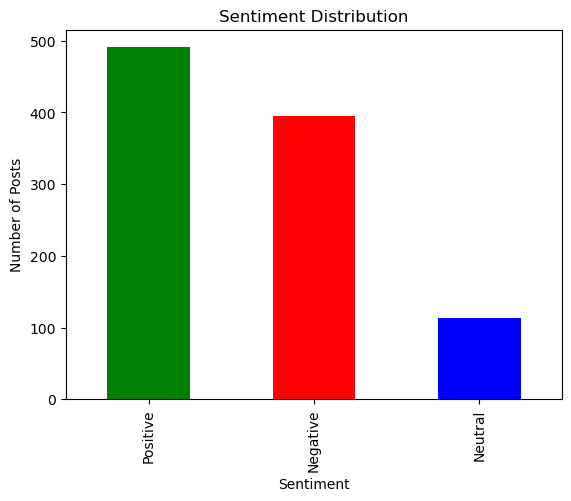

In [12]:
sentiment_counts = validation_df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()


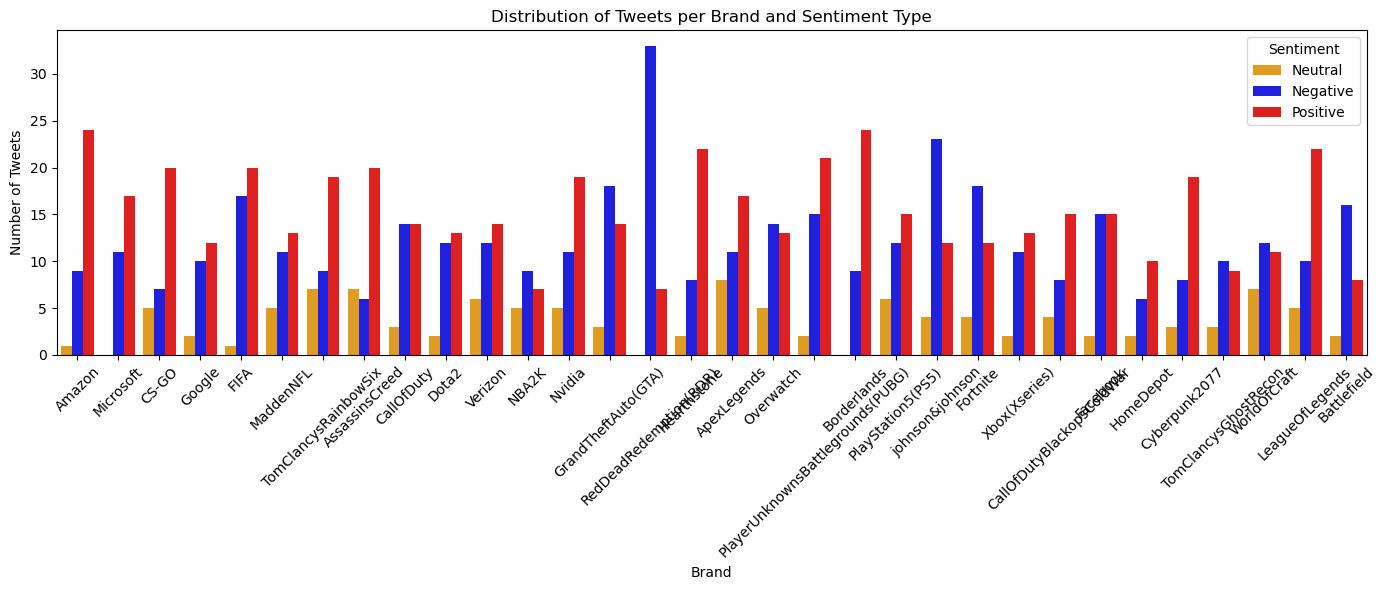

In [13]:
# Plotting
plt.figure(figsize=(14, 6))
sns.countplot(data=validation_df, x=validation_df.columns[1], hue='sentiment',
              palette={'Positive': 'red', 'Neutral': 'orange', 'Negative': 'blue'})
plt.title('Distribution of Tweets per Brand and Sentiment Type')
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [14]:
# Define additional irrelevant/sentimental words
irrelevant_words = {'like', 'love', 'hate', 'good', 'bad', 'great'}

In [15]:
# Preprocess the text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [
        word.lower() for word in tokens if word.lower() not in stop_words 
        and word.isalpha() and word.lower() not in irrelevant_words
    ]
    return ' '.join(filtered_tokens)

In [16]:
# Example usage
text = "I love this product, it's really great and I like it a lot!"
cleaned_text = preprocess_text(text)
print(cleaned_text)

product really lot


In [39]:
# Preprocess function
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'\d+', '', text)
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()
    else:
        text = ''
    return text

In [40]:
# Apply preprocessing
training_df['cleaned_text'] = training_df['text'].apply(preprocess_text)
validation_df['cleaned_text'] = validation_df['text'].apply(preprocess_text)

In [42]:
# Drop rows with NaN values in the 'information' column
training_df.dropna(subset=['information'], inplace=True)
validation_df.dropna(subset=['information'], inplace=True)

In [43]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(training_df['cleaned_text'])
X_test = vectorizer.transform(validation_df['cleaned_text'])

ValueError: empty vocabulary; perhaps the documents only contain stop words